# Optimal Bayes Classifier

This notebook summarises the theory and the derivation of the optimal bayes classifier. It then provides a comparison of the boundaries of the Optimal and Naive Bayes classifiers. 

# Background and theory 

Consider now that instead of having a continuous output variable $Y$, we have instead a categorical output variable $G$. This model is summarized as

- **Input**: $\mathbf{X} \in \mathbb{R}^p$ comes from a $p$ dimensional space
- **Output classification** $\mathbf{G} \in \mathcal{G}$ where $\mathbf{G}$ is a random variable corresponding to the discrete output value, and $\mathcal{G}$ is the discrete output space. 
- **Joint distribution** on the input and output $Pr(X,G) = [(x_1, g_1), (x_1,g_2)...(x_m,g_m)]$
- **Goal** is to learn a function $f(x): \mathbb{R}^p \rightarrow \mathcal{G}$ which takes inputs from the $p$ dimensional input space and maps them to the discrete output space

A first step is to decide on an appropriate loss function, as the usual \qq{squared loss} is not appropriate for discrete outputs. Instead we will use the simple \qq{0-1 loss} function which is defined as follows.

Define the loss as a $K \times K$ matrix, where $K = card(\mathcal{G})$ where the matrix will have 0 on the diagonal and non-negative values otherwise. So the loss $L(k,l)$ is the $k,l$ entry of the matrix, and is the cost of classifying $k$ as $l$. For example, in the case of 3 classes we could get

$$ \begin{bmatrix}  0 & 1 & 1 \\ 1 & 0 & 1 \\ 1 & 1 & 0\end{bmatrix}$$


Which means we can write the 0 - 1 loss function as: 

\begin{aligned}
    L(k,l) &
    \begin{cases}
      0 & \text{if}\ k = l \\
      1 & \text{if}\ k \neq l 
    \end{cases}
    \\
    L(k,l) &= \mathcal{I}(k \neq l) = 1 - \mathcal{I}(k = l)
  \end{aligned} 
  
  
 The Expected Predicted Error (EPE) is therefore: 
 
 $$ EPE(\hat f(x)) = E[L(G, \hat f(X))]$$
 
 Where the expectation is taken with respect to the joint distribution $Pr(X,G)$. Again we can condition on $X$ to obtain
 $$ EPE(\hat f(x)) = E_X  E_{G | X} [L(G,\hat f(X)) | X] $$
 $$ EPE(\hat f(x)) = E_X \sum_{k = 1}^K L [k, \hat f(X)] Pr(k | X)$$

 Where $k = 1,...,K$ are all the possible values that the random variable $G$ can take, i.e. the set $\mathcal{G}$. Note that this is the discrete version which is analogous to the derivations discussed in the previous section. 
 
 As we want to minimize the expected loss we can do the following: 
 

 \begin{aligned}
 	\hat f(x) & = argmin_g \sum_{k = 1}^K L [k, g] Pr(k | X)
	\\
	& =  argmin_g \sum_{k = 1}^K (1 - \mathcal{I}(k = g)) Pr(k | X)
	\\
	& =  argmax_g \sum_{k = 1}^K \mathcal{I}(k = g) Pr(k | X)
\end{aligned}

 
 Since the indicator function is $1$ when $k = g$ we get
 
 $$ \hat f(x)  = argmax_g  Pr(g | X = x) = MAP$$
 
In other words, the optimal Bayes decision rule is to choose the class presenting the maximum posterior probability, given the particular observation at hand. Classifiers such as these are called **Bayes Optimal Classifier** or **Maximum a Posteriori** classifiers.  


 
Since, for a given observation $x$, the marginal distribution of $p(x)$ is constant in the denominator of Bayes theorem, we can simplify this decision rule further as: 
 
 \begin{aligned}
	 \hat f(x)  & = argmax_g  Pr(g | X = x) 
	 \\
	 & = argmax_g  \frac{Pr(x | g) p(g)}{p(x)} 
	 \\
	 & = argmax_g  Pr(x | g) p(g)
	 \\
	 & = argmax_g  \log Pr(x | g) + \log p(g)
 \end{aligned}
 
This form makes clear that the MAP decision rule tries to reach a compromise between the a priori expectations $p(g)$ and the evidence provided by the data via the likelihood function $p(x | g)$. 

## Optimal Bayes Classifier

The Optimal Bayes classifier chooses the class that has greatest a posteriori probability of occurrence (so called **maximum a posteriori estimation, or MAP**). It can be shown that of all classifiers, the Optimal Bayes classifier is the one that will have the lowest probability of miss classifying an observation, i.e. the lowest probability of error.  So if we know the posterior distribution, then using the Bayes classifier is as good as it gets. 


In real-life we usually do not know the posterior distribution, but rather we estimate it. The **Naive Bayes classifier** approximates the optimal Bayes classifier by looking at the empirical distribution and by assuming independence of predictors. So the Naive Bayes classifier is not itself optimal, but it approximates the optimal solution. 


## Sources


- https://stats.stackexchange.com/questions/92180/expected-prediction-error-derivation
- Elements of Statistical Learning ESL
- http://www.lx.it.pt/~mtf/learning/Bayes_lecture_notes.pdf
- https://www.youtube.com/watch?time_continue=28&v=pFtiNSmJuoE


# Implementation

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB

%matplotlib inline
sns.set()

In [2]:
def predict_Bayes_class(X,mu_list,sigma_list): 
    #Returns the predicted class from an optimal bayes classifier - distributions must be known
    scores_list = []
    classes = len(mu_list)
    
    for p in range(classes):
        score = scipy.stats.multivariate_normal.pdf(X, mean=mu_list[p], cov=sigma_list[p])
        scores_list.append(score)
             
    return np.argmax(scores_list)

# Comparing Optimal Bayes and Naive Bayes using simulated Gaussian data

## Strong covariance  

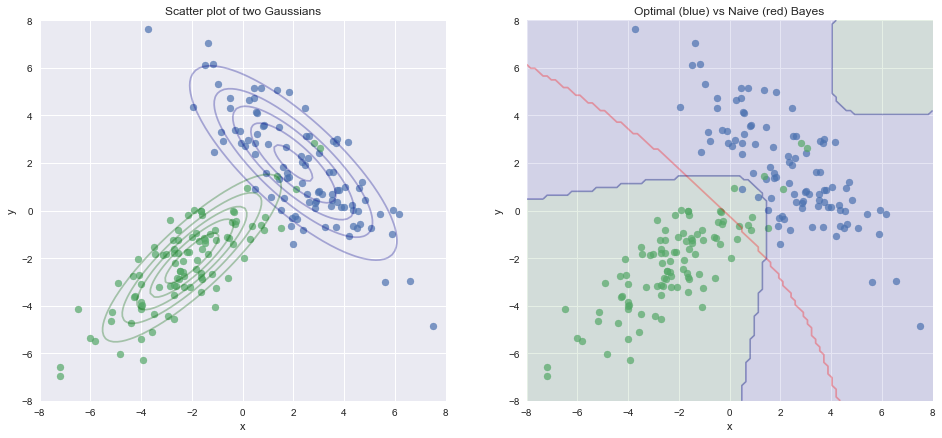

In [3]:

np.random.seed(seed = 3)

mu1 = [2, 2]
sigma1 = [[5, -4], [-4, 5]]
x1, y1 = np.random.multivariate_normal(mu1, sigma1, 100).T

mu2 = [-2, -2]
sigma2 = [[3.5, 3], [3, 3.5]]
x2, y2 = np.random.multivariate_normal(mu2, sigma2, 100).T

mu_list = [mu1,mu2]
sigma_list = [sigma1,sigma2]
color_list = ['darkblue','darkgreen']

# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(-8, 8, N)
Y = np.linspace(-8, 8, N)
X, Y = np.meshgrid(X, Y)

#Setup of figure
fig = plt.figure(figsize = (16,7))
ax = fig.add_subplot(1, 2, 1)

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#

#Plotting the contours of the Gaussians on left hand side plot
for i in range(2):
    zz = np.array(  [scipy.stats.multivariate_normal.pdf(np.array([xx,yy]), mean=mu_list[i], cov=sigma_list[i]) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

#Reshaping the predicted class into the meshgrid shape
    Z = zz.reshape(X.shape)

#Plot the  contours
    ax.contour( X, Y, Z, 5, alpha = .3, colors = color_list[i])


ax.scatter(x1, y1, alpha = .7)
ax.scatter(x2, y2, alpha = .7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Scatter plot of two Gaussians')

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#

#Right hand side plot - Optimal Bayes classifier
ax = fig.add_subplot(1, 2, 2)

#Plotting the contours of the Gaussians on left hand side plot

zz = np.array(  [ predict_Bayes_class(np.array([xx,yy]),mu_list,sigma_list) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)

#Plot the  contours
ax.contour( X, Y, Z, 1, alpha = .3, colors = ('darkblue','darkgreen'))
ax.contourf( X, Y, Z, 1, alpha = .1, colors = ('darkblue','darkgreen'))

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

#Setup X and y data
X_data = np.asarray(np.vstack((np.hstack((x1,x2)),np.hstack((y1,y2)))).T)
y_labels = np.hstack((np.zeros(100),np.ones(100)))

#Fit model
model_sk = GaussianNB(priors = None)
model_sk.fit(X_data,y_labels)

#Predictions for each point on meshgrid
zz = np.array(  [model_sk.predict( [[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)

#Plot the  contours
ax.contour( X, Y, Z, 1, alpha = .3, colors = ('red'))



ax.scatter(x1, y1, alpha = .7)
ax.scatter(x2, y2, alpha = .7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Optimal (blue) vs Naive (red) Bayes')



plt.show()

## Accuracies

In [4]:
#Optimal Bayes accuracy
y_pred = np.array(  [predict_Bayes_class(np.array([xx,yy]),mu_list,sigma_list) 
                     for xx, yy in zip(np.ravel(X_data[:,0]), np.ravel(X_data[:,1])) ] )
display(np.mean(y_pred == y_labels))


#Naive Bayes accuracy
display(model_sk.score(X_data,y_labels))


0.965

0.95

## Comparing Optimal Bayes and Naive Bayes - zero covariance 

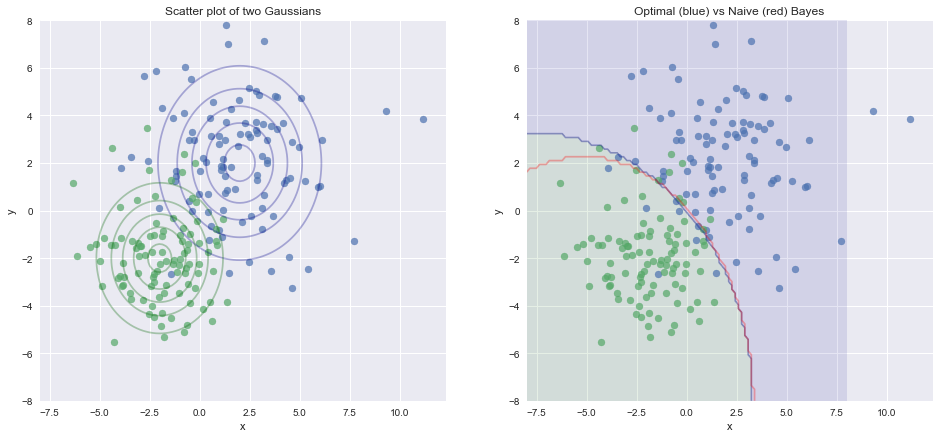

In [5]:

np.random.seed(seed = 2)

mu1 = [2, 2]
sigma1 = [[5, 0], [0, 5]]
x1, y1 = np.random.multivariate_normal(mu1, sigma1, 100).T

mu2 = [-2, -2]
sigma2 = [[3, 0], [0, 3]]
x2, y2 = np.random.multivariate_normal(mu2, sigma2, 100).T

mu_list = [mu1,mu2]
sigma_list = [sigma1,sigma2]
color_list = ['darkblue','darkgreen']

# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(-8, 8, N)
Y = np.linspace(-8, 8, N)
X, Y = np.meshgrid(X, Y)

#Setup of figure
fig = plt.figure(figsize = (16,7))
ax = fig.add_subplot(1, 2, 1)

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#

#Plotting the contours of the Gaussians on left hand side plot
for i in range(2):
    zz = np.array(  [scipy.stats.multivariate_normal.pdf(np.array([xx,yy]), mean=mu_list[i], cov=sigma_list[i]) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

#Reshaping the predicted class into the meshgrid shape
    Z = zz.reshape(X.shape)

#Plot the  contours
    ax.contour( X, Y, Z, 5, alpha = .3, colors = color_list[i])


ax.scatter(x1, y1, alpha = .7)
ax.scatter(x2, y2, alpha = .7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Scatter plot of two Gaussians')

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#

#Right hand side plot - Optimal Bayes classifier
ax = fig.add_subplot(1, 2, 2)

#Plotting the contours of the Gaussians on left hand side plot

zz = np.array(  [ predict_Bayes_class(np.array([xx,yy]),mu_list,sigma_list) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)

#Plot the  contours
ax.contour( X, Y, Z, 1, alpha = .3, colors = ('darkblue','darkgreen'))
ax.contourf( X, Y, Z, 1, alpha = .1, colors = ('darkblue','darkgreen'))

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

#Setup X and y data
X_data = np.asarray(np.vstack((np.hstack((x1,x2)),np.hstack((y1,y2)))).T)
y_labels = np.hstack((np.zeros(100),np.ones(100)))

#Fit model
model_sk = GaussianNB(priors = None)
model_sk.fit(X_data,y_labels)

#Predictions for each point on meshgrid
zz = np.array(  [model_sk.predict( [[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)

#Plot the  contours
ax.contour( X, Y, Z, 1, alpha = .3, colors = ('red'))



ax.scatter(x1, y1, alpha = .7)
ax.scatter(x2, y2, alpha = .7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Optimal (blue) vs Naive (red) Bayes')



plt.show()

## Accuracy 

In [6]:
#Optimal Bayes accuracy
y_pred = np.array(  [predict_Bayes_class(np.array([xx,yy]),mu_list,sigma_list) 
                     for xx, yy in zip(np.ravel(X_data[:,0]), np.ravel(X_data[:,1])) ] )
display(np.mean(y_pred == y_labels))


#Naive Bayes accuracy
display(model_sk.score(X_data,y_labels))


0.91

0.91